In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
movie_data = pd.read_csv("/content/drive/MyDrive/a1_IMDB_Dataset.csv")

In [4]:
movie_data.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [5]:
movie_data.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [6]:
movie_data.shape

(50000, 2)

In [7]:
movie_data.isnull().values.any()

False

In [8]:
movie_data.columns

Index(['review', 'sentiment'], dtype='object')

In [9]:
movie_data["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [10]:
movie_data.duplicated().values.any()

True

In [11]:
movie_data.drop_duplicates(inplace=True)

In [12]:
movie_data.duplicated().values.any()

False

In [21]:
movie_data["review"][10]

'Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn\'t find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try "Brother from another planet"'

In [22]:
import os
import re

In [23]:
html_tag_remover = re.compile(r'<[^>]+>')

def remove_tags(text):
  return html_tag_remover.sub('', text)

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords

In [26]:
def preprocess_text(sen):
  sentence = sen.lower()
  #Converted all texts to lower case

  sentence = remove_tags(sentence)
  #Removed html tags

  sentence = re.sub('[^a-zA-Z]', ' ', sentence)
  #Removed punctuations and numbers

  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence) 
  #Removed apostrophe

  sentence = re.sub(r'\s+', ' ', sentence)
  #Removed the extra spaces from the text

  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  sentence = pattern.sub('', sentence)
  #Removed Stopwords

  return sentence

In [27]:
Preprocessed_data = [ ]
sentences = list(movie_data['review'])
for i in sentences:
  Preprocessed_data.append(preprocess_text(i))

In [28]:
Preprocessed_data[10]

'phil alien one quirky films humour based around oddness everything rather actual punchlines first odd pretty funny movie progressed find jokes oddness funny anymore low budget film thats never problem pretty interesting characters eventually lost interest imagine film would appeal stoner currently partaking something similar better try brother another planet '

In [29]:
y = movie_data['sentiment']

labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Preprocessed_data, labels, test_size=0.10, random_state=42)

In [31]:
from keras.preprocessing.text import Tokenizer
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

In [32]:
X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [33]:
print(X_train[:10])

[[2, 2013, 16, 202, 6224, 26206, 560, 2579, 3819, 770, 3048, 1453, 2038, 550, 14, 31578, 214, 650, 187, 279, 9, 25, 326, 112, 1453, 6267, 187, 22, 300, 3, 1823, 17, 27723, 1259, 3, 2257, 155, 847, 6, 9, 31578, 8, 16, 1, 185, 108, 10234, 625], [1513, 11, 125, 585, 1474, 252, 3975, 58, 472, 264, 91, 699, 163, 125, 11443, 1326, 149, 9977, 1019, 6268, 1, 941, 6, 4254, 119, 14206, 218, 29481, 34, 732, 3055, 1997, 9734, 3055, 191, 157, 273, 1327, 8618, 1411, 694, 1971, 4966, 7, 60, 3055, 737, 47883, 3444, 139, 281, 1010, 1656, 2, 2, 12656, 635, 3055, 1, 588, 76, 6225, 3098, 25, 4277, 186, 13, 321, 565, 1317, 175, 86, 106, 5392, 8258, 588, 76, 30, 24, 1619, 3, 193, 19812, 186, 202, 43, 1243, 2563, 1288, 34068, 109, 4945, 2563, 1288, 34068, 74, 19813, 23, 9328, 31579, 524, 1243, 880, 1808, 2526, 14813, 5654, 37, 667, 403, 3748, 3571, 1066, 1275, 469, 62, 43, 3960, 3011, 14207, 5698, 2381, 46, 3444, 234, 1118, 683, 16643, 1411, 125, 82, 41, 312, 17073, 494, 1243, 754, 30, 59, 5699, 667, 5455, 3

In [34]:
word_tokenizer.word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'bad': 14,
 'get': 15,
 'great': 16,
 'people': 17,
 'also': 18,
 'first': 19,
 'made': 20,
 'make': 21,
 'way': 22,
 'could': 23,
 'movies': 24,
 'characters': 25,
 'think': 26,
 'watch': 27,
 'character': 28,
 'films': 29,
 'two': 30,
 'many': 31,
 'seen': 32,
 'never': 33,
 'plot': 34,
 'acting': 35,
 'love': 36,
 'life': 37,
 'best': 38,
 'know': 39,
 'show': 40,
 'little': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'scene': 46,
 'still': 47,
 'say': 48,
 'scenes': 49,
 'something': 50,
 'go': 51,
 'back': 52,
 'real': 53,
 'thing': 54,
 'watching': 55,
 'actors': 56,
 'director': 57,
 'years': 58,
 'old': 59,
 'though': 60,
 'funny': 61,
 'another': 62,
 'work': 63,
 'actually': 64,
 'nothing': 65,
 'look': 66,
 'makes': 67,
 'find': 68,
 'going': 69,
 'lot': 70,
 'new': 71,
 'every': 72,
 'part': 73,
 'wo

In [35]:
vocab_length = len(word_tokenizer.word_index) + 1
print(vocab_length)

96875


In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [37]:
X_train = pad_sequences(X_train, padding='post', maxlen=100)
X_test = pad_sequences(X_test, padding='post', maxlen=100)

In [39]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

Loaded glove word embeddings and created a dictionary

In [40]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

Created embedding matrix of 100 columns

In [41]:
embedding_matrix.shape

(96875, 100)

In [42]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers.core import Activation,Dense
from keras.layers import Embedding

In [43]:
glove_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=100 , trainable=False)

glove_model.add(embedding_layer)
glove_model.add(LSTM(128))

glove_model.add(Dense(1, activation='sigmoid'))

In [44]:
glove_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(glove_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9687500   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 9,804,877
Trainable params: 117,377
Non-trainable params: 9,687,500
_________________________________________________________________
None


In [46]:
glove_model_history = glove_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
279/279 [==============================] - 3s 11ms/step - loss: 0.3318 - accuracy: 0.8592 - val_loss: 0.3415 - val_accuracy: 0.8476
Epoch 2/10
279/279 [==============================] - 3s 12ms/step - loss: 0.3115 - accuracy: 0.8670 - val_loss: 0.3404 - val_accuracy: 0.8513
Epoch 3/10
279/279 [==============================] - 3s 11ms/step - loss: 0.2908 - accuracy: 0.8783 - val_loss: 0.3297 - val_accuracy: 0.8574
Epoch 4/10
279/279 [==============================] - 3s 9ms/step - loss: 0.2748 - accuracy: 0.8885 - val_loss: 0.3395 - val_accuracy: 0.8652
Epoch 5/10
279/279 [==============================] - 3s 11ms/step - loss: 0.2557 - accuracy: 0.8963 - val_loss: 0.3488 - val_accuracy: 0.8527
Epoch 6/10
279/279 [==============================] - 3s 11ms/step - loss: 0.2405 - accuracy: 0.9047 - val_loss: 0.3423 - val_accuracy: 0.8669
Epoch 7/10
279/279 [==============================] - 3s 10ms/step - loss: 0.2175 - accuracy: 0.9152 - val_loss: 0.3404 - val_accuracy: 0.8653


In [47]:
score = glove_model.evaluate(X_test, y_test, verbose=1)

155/155 [==============================] - 1s 5ms/step - loss: 0.4085 - accuracy: 0.8649


In [48]:
print(glove_model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


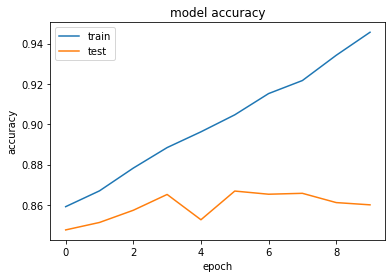

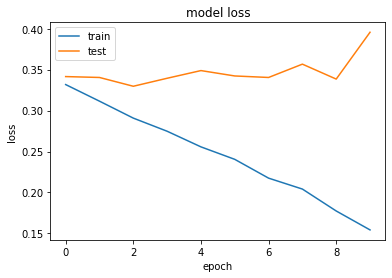

In [49]:
import matplotlib.pyplot as plt
plt.plot(glove_model_history.history['accuracy'])
plt.plot(glove_model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(glove_model_history.history['loss'])
plt.plot(glove_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()